 🚲 Used Bike Prices - Business Analysis

1. Introduction
2. Data Cleaning & Preprocessing
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
    Brand-Level Insights
    City-Level Insights
    Mileage & Power Trends
 5. Summary & Business Insights

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\harsh\Desktop\Used Bike Prices\bikes.csv")

In [3]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [4]:
df.tail()


,model_name,model_year,kms_driven,owner,location,mileage,power,price
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 Km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


In [5]:
df['bike_age'] =2025-df['model_year']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
 8   bike_age    7857 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 552.6+ KB


In [7]:
df.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
bike_age       0
dtype: int64

In [8]:
def clean_kms(val):
    try: 
        return float(''.join([c for c in str(val)if c.isdigit()]))
    except:
        return None
df['kms_driven']= df['kms_driven'].apply(clean_kms)

In [9]:
df[['kms_driven']].head()

,kms_driven
0,17000.0
1,50000.0
2,14795.0
3,28.0
4,2000.0


In [10]:
import re

def extract_cc(name):
    match = re.search(r'(\d+)\s?cc', str(name).lower())
    return int(match.group(1)) if match else None

df['cc'] = df['model_name'].apply(extract_cc)


In [11]:
df[['cc']].head(10)

,cc
0,NaN
1,350.0
2,NaN
3,NaN
4,330.0
5,200.0
6,180.0
7,NaN
8,390.0
9,150.0


In [12]:
 def extract_cc(name):
        match = re.search(r'(\d+)\s?cc', str(name).lower())
        return int (match.group(1)) if match else None
df['cc'] = df['model_name'].apply(extract_cc)

In [13]:
def extract_mileage(value):
    match = re.search(r'(\d+\.?\d*)', str(value))
    return float (match.group(1))if match else None
                      
df['mileage'] = df['mileage'].apply(extract_mileage)

In [14]:
def extract_power(value):
    match = re.search(r'(\d+\.?\d*)', str(value))
    return float (match.group(1))if match else None
df['power'] = df['power'].apply(extract_power)

In [15]:
df[['mileage']].head(10)

,mileage
0,35.0
1,35.0
2,30.0
3,28.0
4,NaN
5,35.0
6,65.0
7,40.0
8,25.0
9,58.0


In [16]:
df[['power']].head(10)

,power
0,19.00
1,19.80
2,28.00
3,34.50
4,30.00
5,25.00
6,17.00
7,20.21
8,42.90
9,13.00


In [17]:
df[['cc', 'mileage', 'power']].isnull().sum()


cc         2096
mileage     774
power        31
dtype: int64

In [18]:
df['cc'].fillna(df['cc'].median(), inplace= True)

In [19]:
df['mileage'].fillna(df['mileage'].mean(), inplace = True)

In [20]:
df['power'].fillna(df['power'].mean(),inplace= True)

In [21]:
df[['cc', 'mileage', 'power']].isnull().sum()

cc         0
mileage    0
power      0
dtype: int64

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

In [24]:
sns.set (style= "whitegrid")

In [25]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

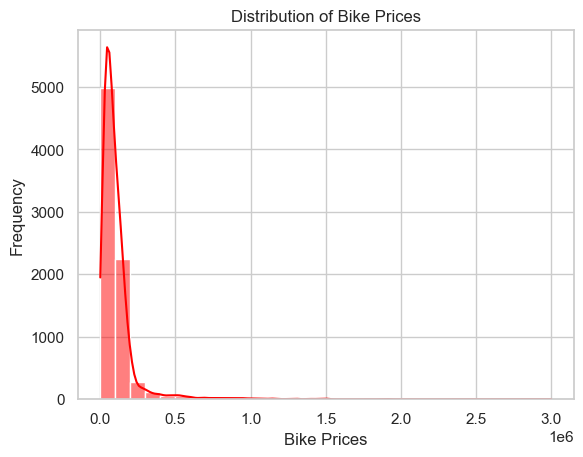

In [26]:
sns.histplot(df['price'], kde= True, bins= 30, color= 'red')
plt.title("Distribution of Bike Prices")
plt.xlabel("Bike Prices")
plt.ylabel("Frequency")
plt.show()

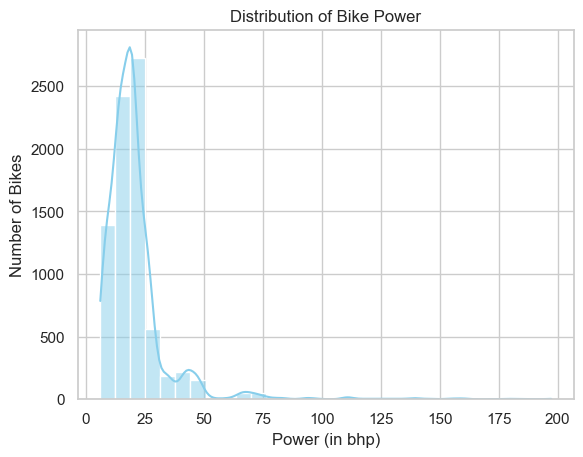

In [27]:
plt.pltfigure=(10,5)
sns.histplot(df['power'], kde=True, bins=30, color='Skyblue')
plt.title("Distribution of Bike Power")
plt.xlabel("Power (in bhp)")
plt.ylabel("Number of Bikes")
plt.show()

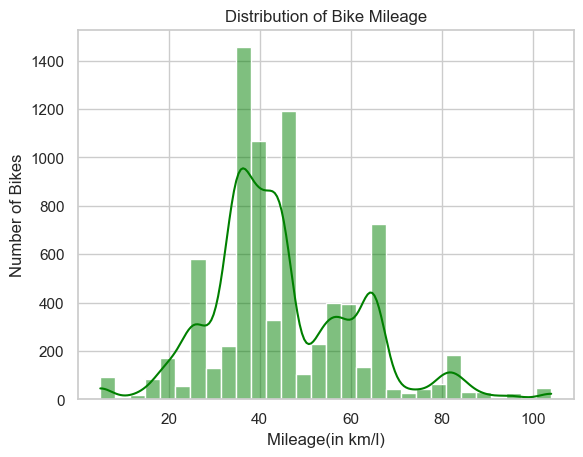

In [28]:
plt.pltfigure=(10,5)
sns.histplot(df['mileage'], kde= True, bins=30, color='green')
plt.title("Distribution of Bike Mileage")
plt.xlabel("Mileage(in km/l)")
plt.ylabel("Number of Bikes")
plt.show()


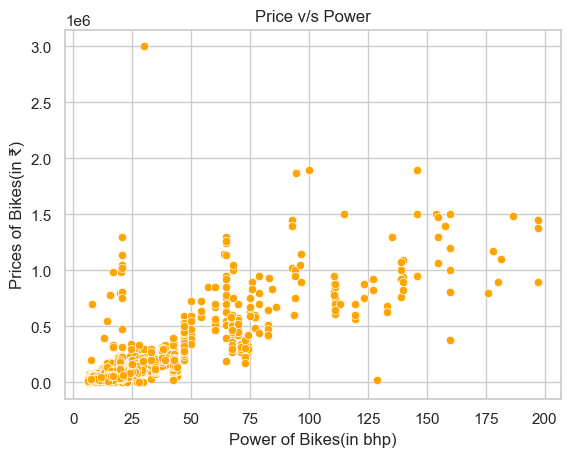

In [29]:
plt.pltfigure=(10,10)
sns.scatterplot(x='power', y='price', data=df, color='orange')
plt.title("Price v/s Power")
plt.xlabel("Power of Bikes(in bhp)")
plt.ylabel("Prices of Bikes(in ₹)")
plt.show()

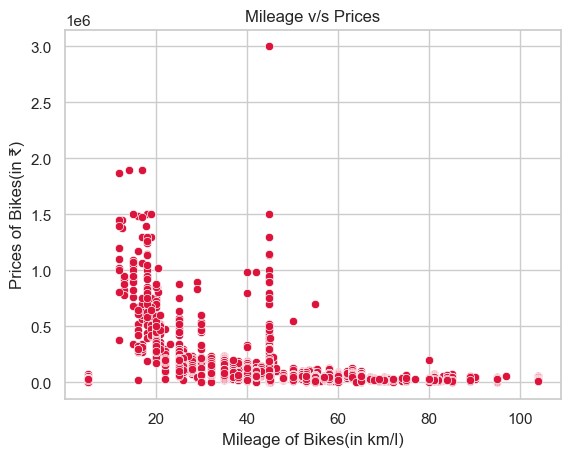

In [30]:
plt.pltfigure=(10,20)
sns.scatterplot(x='mileage', y='price', data=df, color='crimson')
plt.title("Mileage v/s Prices")
plt.xlabel("Mileage of Bikes(in km/l)")
plt.ylabel("Prices of Bikes(in ₹)")
plt.show()


In [31]:
df['brand']= df['model_name'].apply(lambda x: str (x).split()[0])

In [32]:
df['brand'].head(10)


0      Bajaj
1      Royal
2    Hyosung
3      Bajaj
4       Jawa
5        KTM
6      Bajaj
7        TVS
8        KTM
9     Yamaha
Name: brand, dtype: object

In [33]:
avg_price= df.groupby('brand')['price'].mean().sort_values(ascending=False)

In [34]:
print(avg_price.head(10))

brand
Indian             1.900000e+06
Moto               1.866057e+06
MV                 1.225000e+06
Aprilia            1.000000e+06
Ducati             9.762937e+05
Triumph            8.431832e+05
Harley-Davidson    5.127226e+05
Kawasaki           4.965177e+05
BMW                3.978600e+05
Fb                 3.208500e+05
Name: price, dtype: float64


In [35]:
top_avgprice= avg_price.apply(lambda x: f"₹{x:,.0f}")

In [36]:
print(top_avgprice.head(10))

brand
Indian             ₹1,900,000
Moto               ₹1,866,057
MV                 ₹1,225,000
Aprilia            ₹1,000,000
Ducati               ₹976,294
Triumph              ₹843,183
Harley-Davidson      ₹512,723
Kawasaki             ₹496,518
BMW                  ₹397,860
Fb                   ₹320,850
Name: price, dtype: object


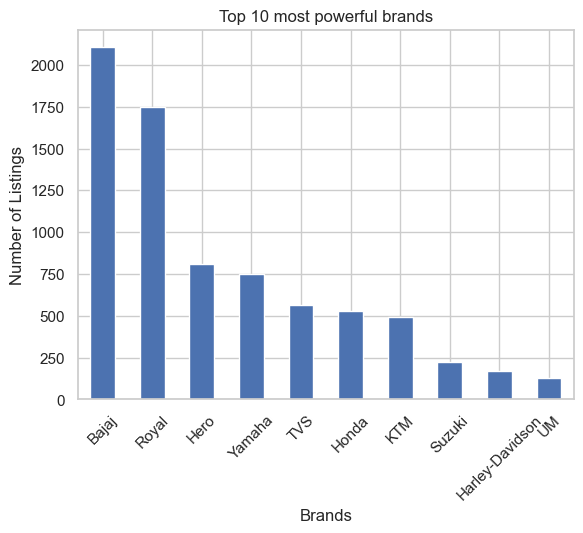

In [37]:
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 most powerful brands")
plt.xlabel("Brands")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

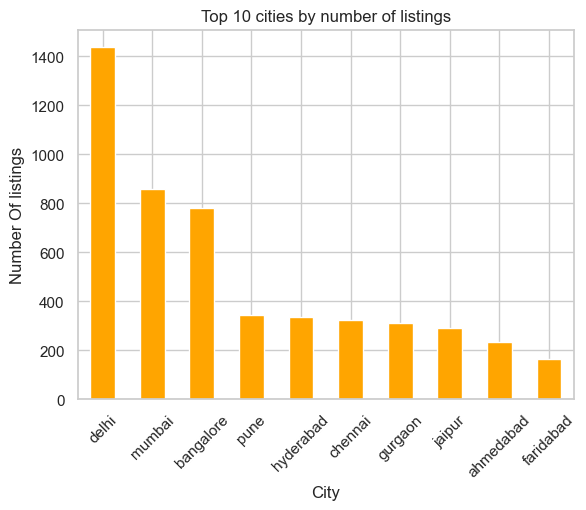

In [38]:
df['location'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 cities by number of listings")
plt.xlabel("City")
plt.ylabel("Number Of listings")
plt.xticks(rotation=45)
plt.show()

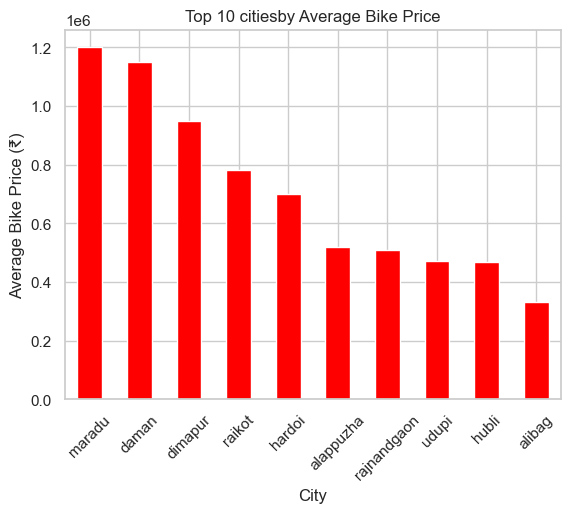

In [39]:
df.groupby('location')['price'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title("Top 10 citiesby Average Bike Price")
plt.xlabel("City")
plt.ylabel("Average Bike Price (₹)")
plt.xticks(rotation=45)
plt.show()

📊 Final Business Insights – Used Bike Market Analysis

🔹 1. Most Listed Bike Brands
- Hero, Honda, and Bajaj have the highest number of listings.
- These brands dominate the used bike resale market due to their affordability and trust.

🔹 2. Premium Brands by Average Price
- Indian, Moto, and MV Agusta have the highest average resale prices (₹10L+).
- These are premium or niche brands with fewer listings but high prices.


🔹 3. City-Level Market Trends
- Top Cities by Number of Listings: Delhi, Bangalore, Pune.
- Top Cities by Average Price: Mumbai, Chandigarh, Delhi.
- Indicates that metro cities drive both volume and premium pricing.

🔹 4. Power vs Price
- Strong positive correlation: Higher bhp (power) → Higher price.
- Performance bikes are priced higher regardless of mileage.

🔹 5. Mileage vs Price
- Surprisingly, some bikes with lower mileage (fuel efficiency) are still expensive.
- Likely because they are performance or premium models where mileage isn't a priority.


🔹 6. Price Distribution
- Most used bikes are priced below ₹1 lakh.
- A few bikes priced ₹5–₹10 lakhs act as outliers and affect the average.

🔹 7. Data Quality & Cleaning
- `kms_driven`, `power`, `mileage`, and `cc` required cleaning and type conversion.
- Used regex and `apply()` functions to extract numeric values from strings.

---

📈 Business Value
These insights help resale platforms (like OLX, Droom, BikeDekho):
- Understand market supply by brand & city.
- Identify premium vs budget segments.
- Make pricing recommendations and target listings effectively.
